In [1]:
from datetime import datetime
from datetime import timedelta
import shapefile
import xml.etree.ElementTree as ET
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
from pyproj import Proj, transform
from pymongo import MongoClient
%matplotlib inline


-----------------------------

percentiles_on_call_in


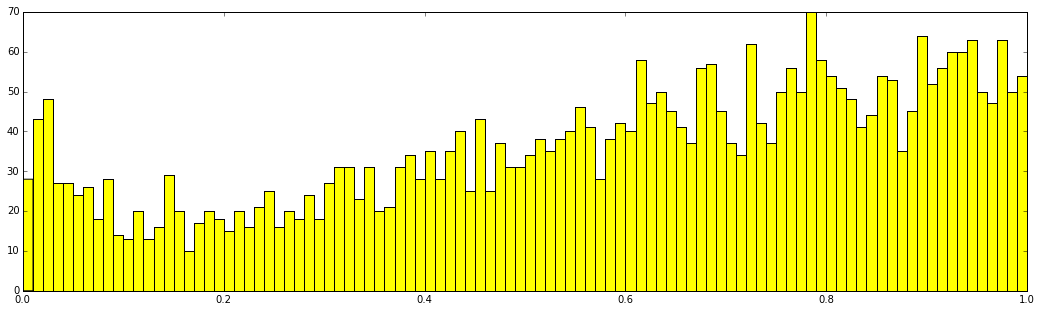

entropy:  4.52416301022 average:  0.593401009351

percentiles_on_call_in /avg percentile for each cell


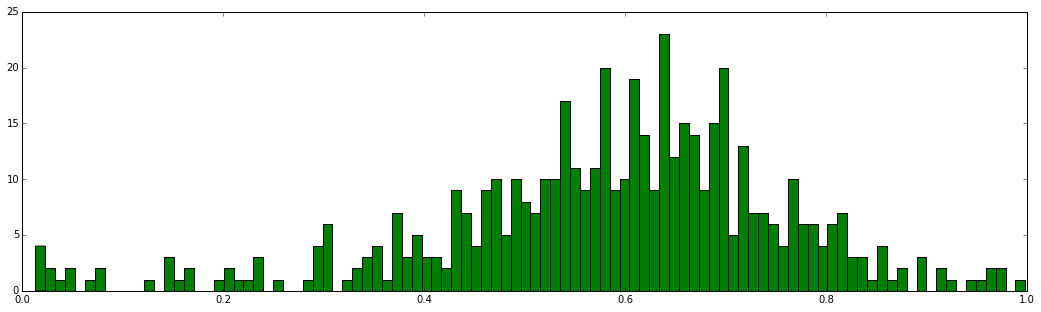


percentiles_on_call_in /min percentile for each cell


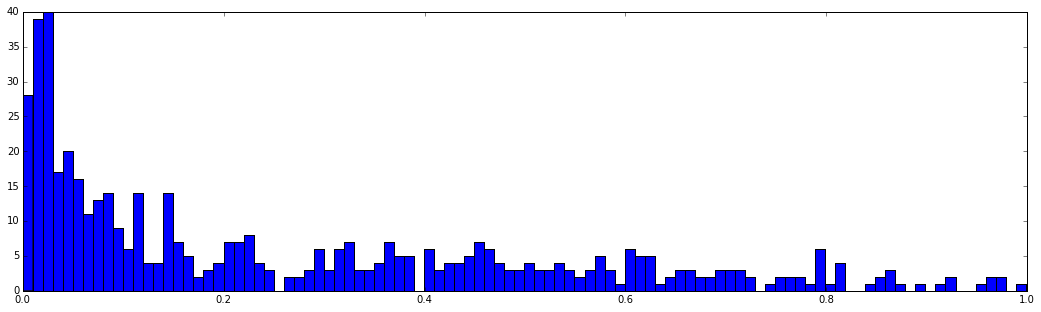


percentiles_on_call_in /max percentile for each cell


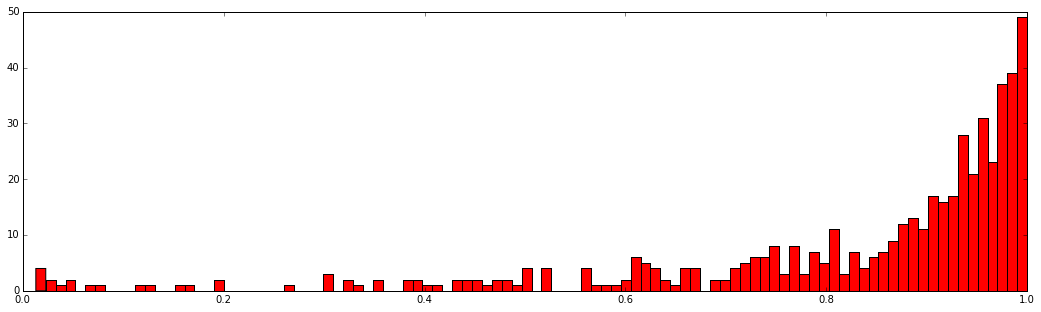


-----------------------------

percentiles_on_call_out


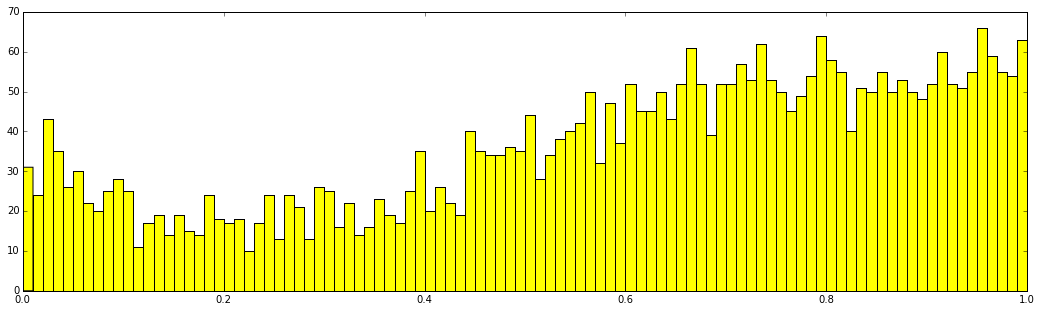

entropy:  4.50889752711 average:  0.604788620451

percentiles_on_call_out /avg percentile for each cell


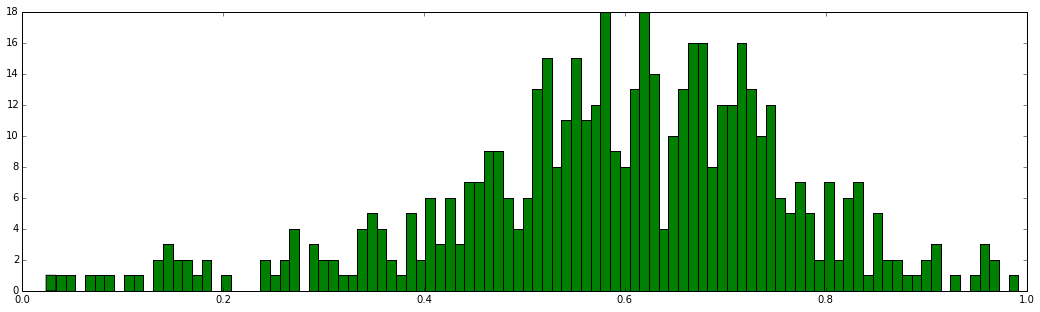


percentiles_on_call_out /min percentile for each cell


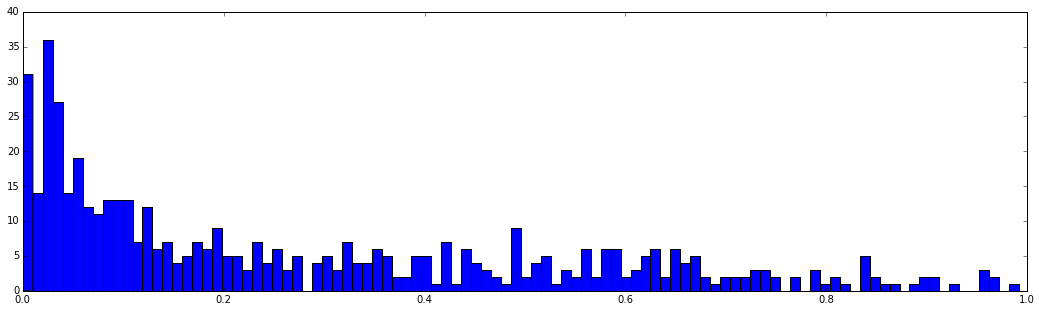


percentiles_on_call_out /max percentile for each cell


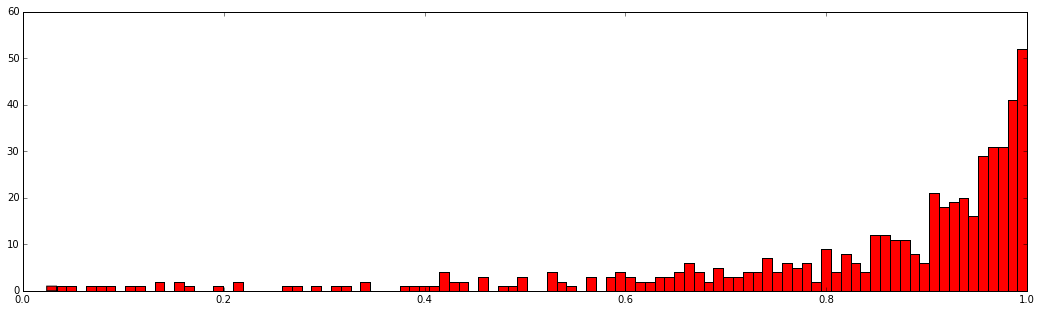


-----------------------------

percentiles_on_sms_in


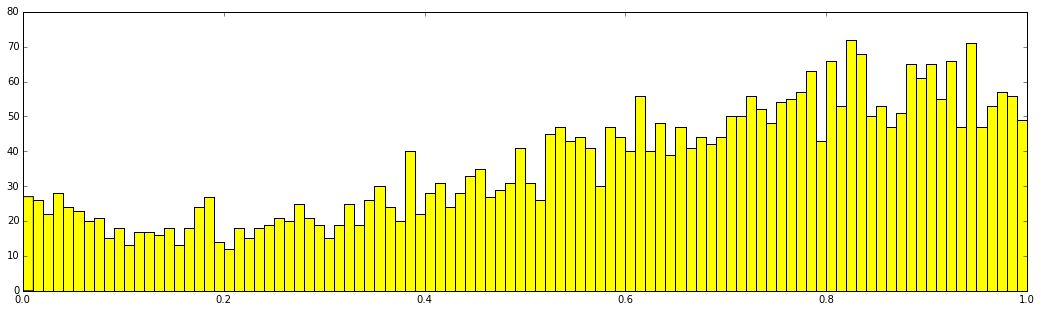

entropy:  4.50532525881 average:  0.614256670986

percentiles_on_sms_in /avg percentile for each cell


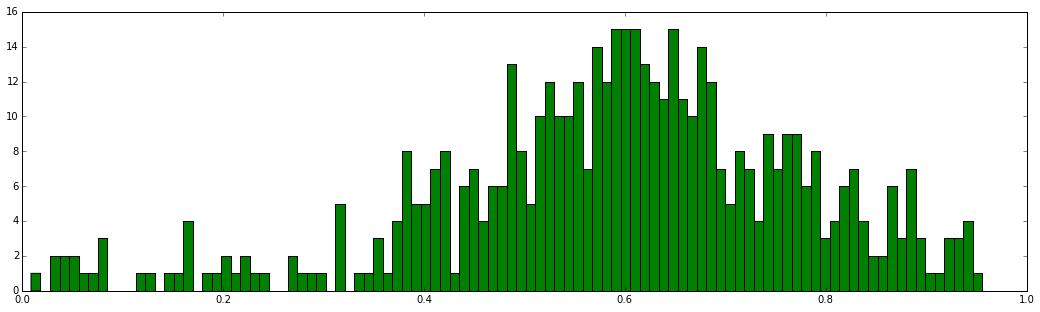


percentiles_on_sms_in /min percentile for each cell


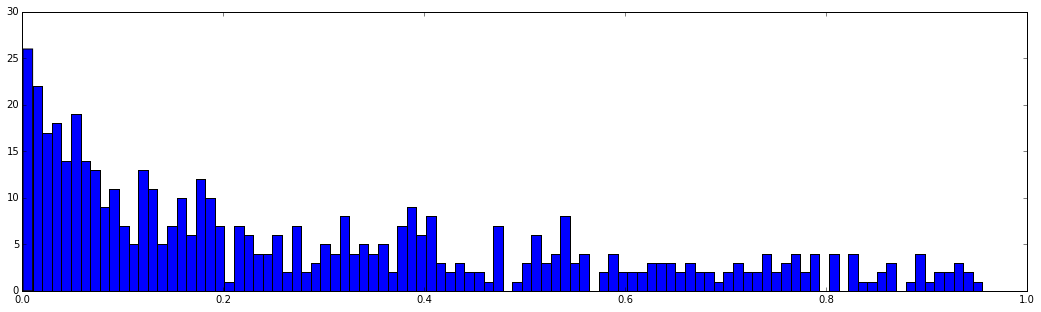


percentiles_on_sms_in /max percentile for each cell


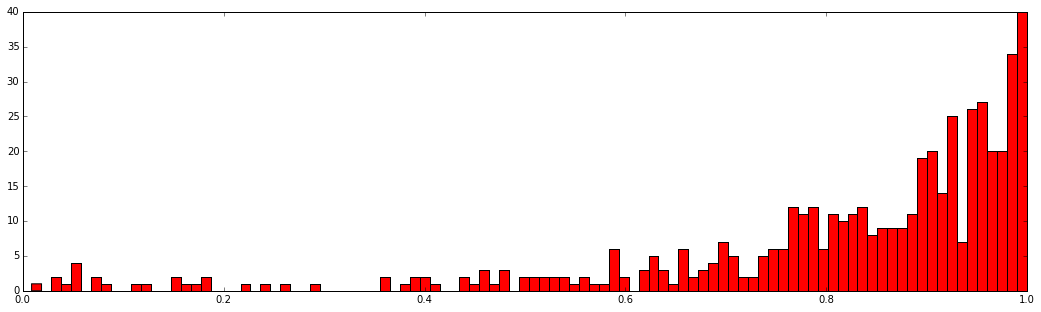


-----------------------------

percentiles_on_sms_out


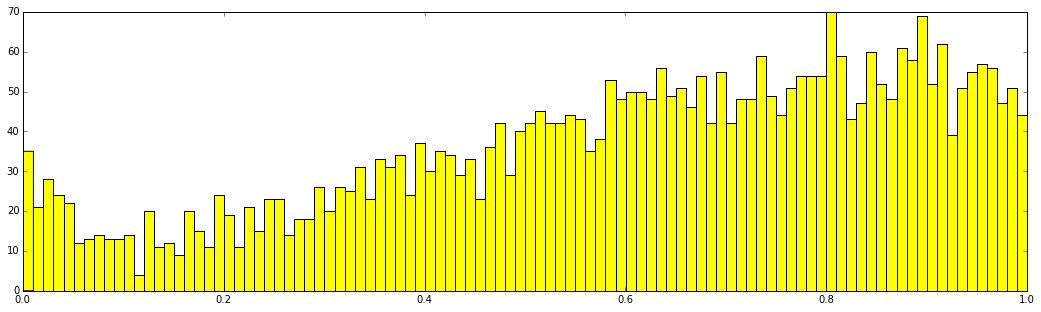

entropy:  4.49954025763 average:  0.612631686052

percentiles_on_sms_out /avg percentile for each cell


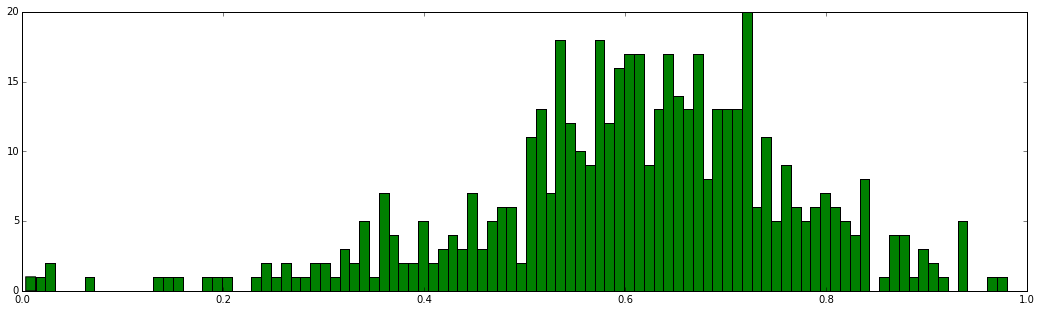


percentiles_on_sms_out /min percentile for each cell


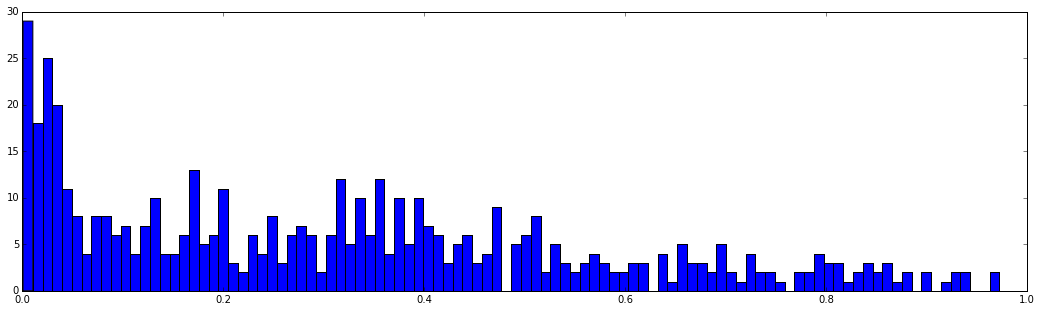


percentiles_on_sms_out /max percentile for each cell


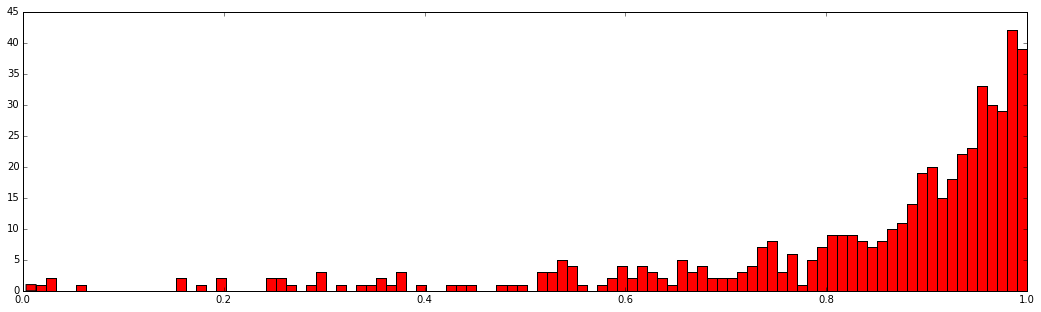


-----------------------------

percentiles_on_call_in_hourly


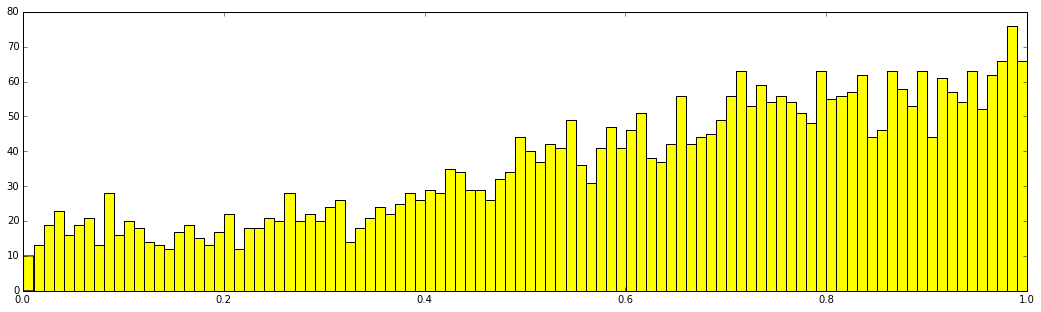

entropy:  4.49279623781 average:  0.626392958511

percentiles_on_call_in_hourly /avg percentile for each cell


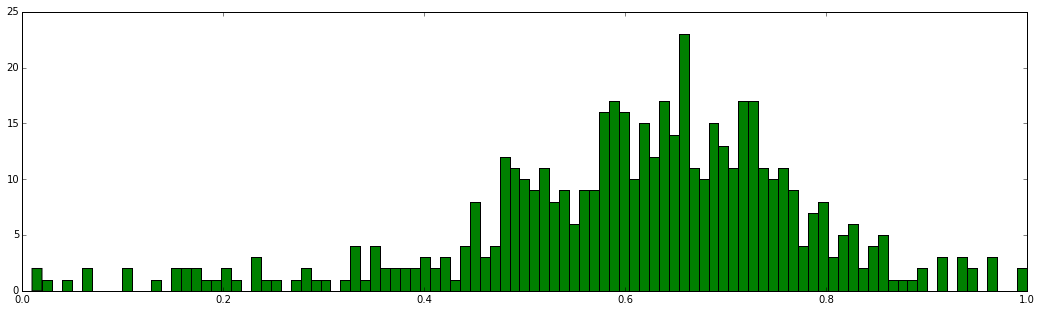


percentiles_on_call_in_hourly /min percentile for each cell


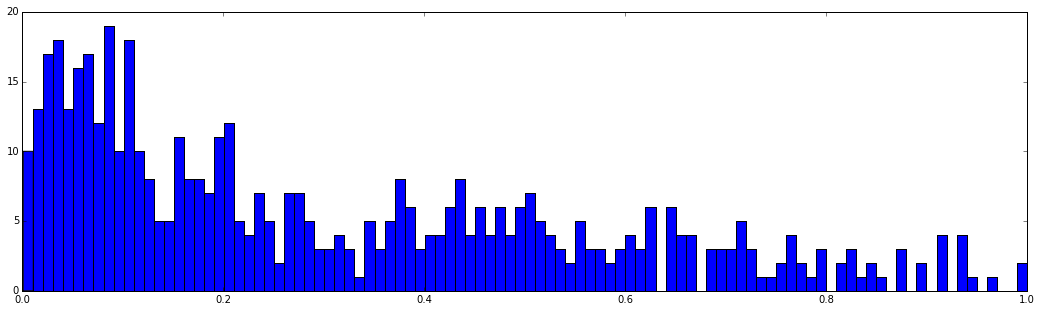


percentiles_on_call_in_hourly /max percentile for each cell


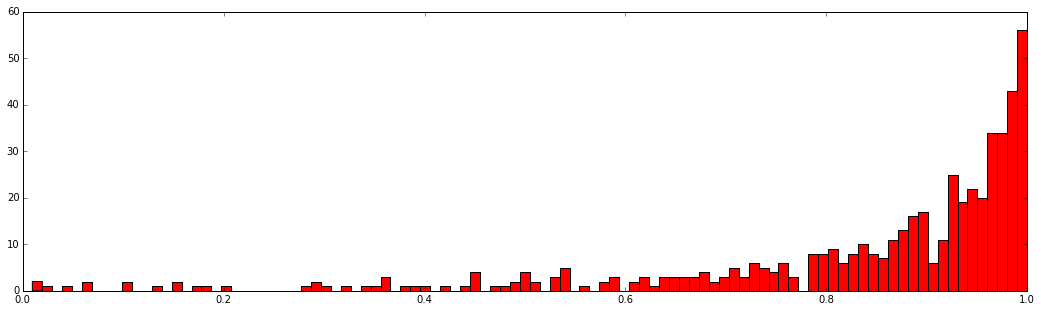


-----------------------------

percentiles_on_call_out_hourly


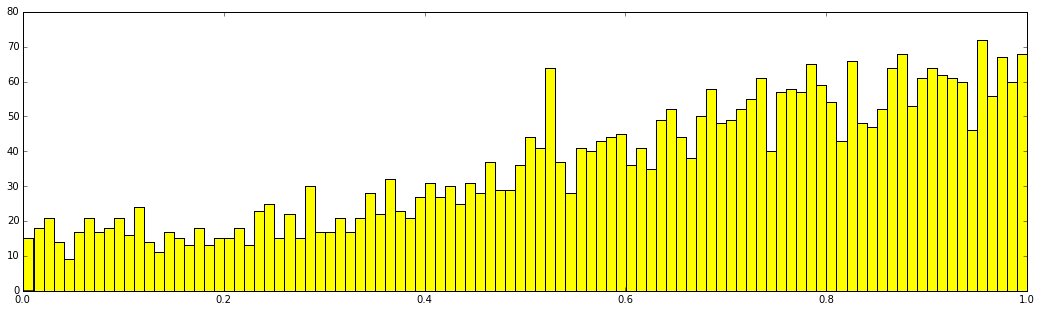

entropy:  4.48373565631 average:  0.630222582148

percentiles_on_call_out_hourly /avg percentile for each cell


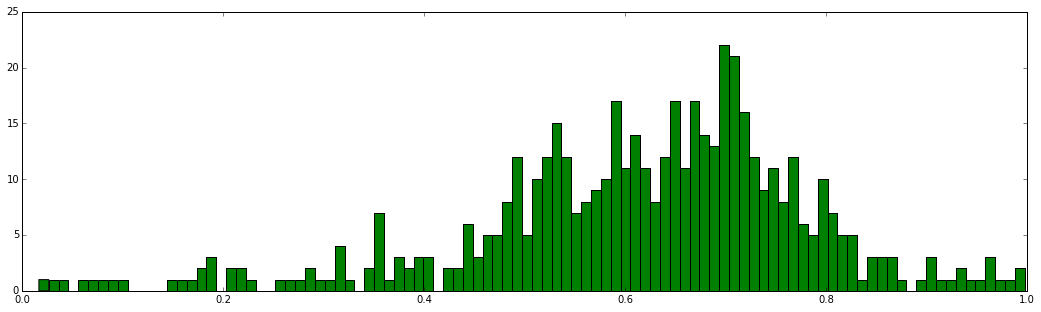


percentiles_on_call_out_hourly /min percentile for each cell


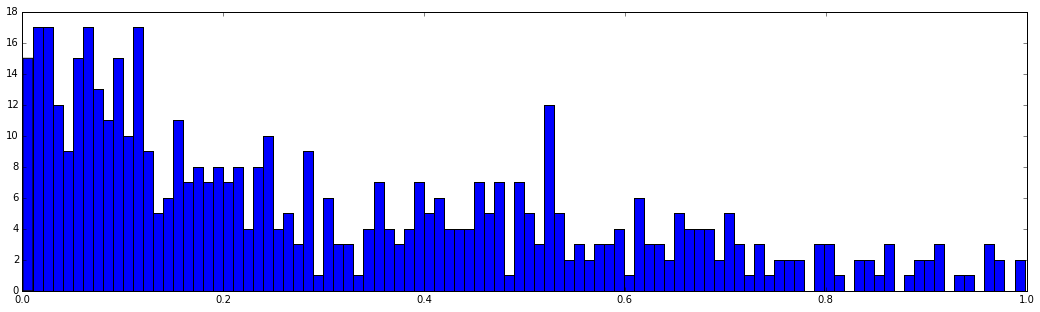


percentiles_on_call_out_hourly /max percentile for each cell


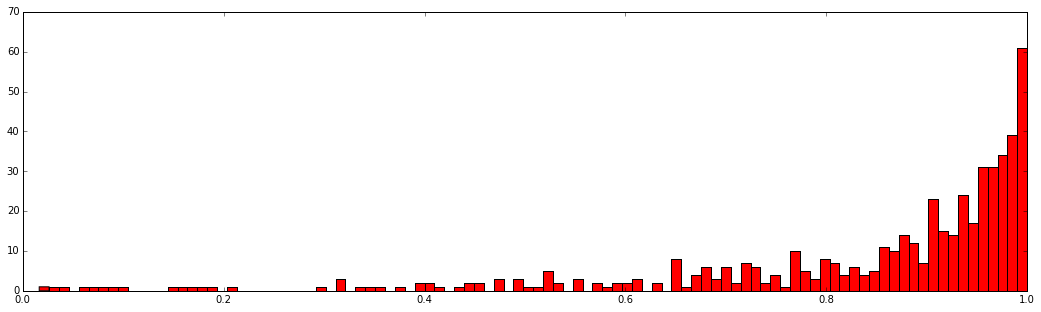


-----------------------------

percentiles_on_sms_in_hourly


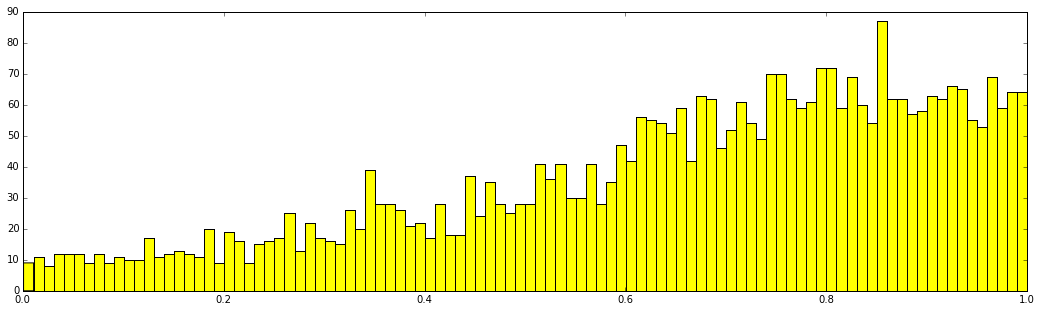

entropy:  4.42669028403 average:  0.657262870749

percentiles_on_sms_in_hourly /avg percentile for each cell


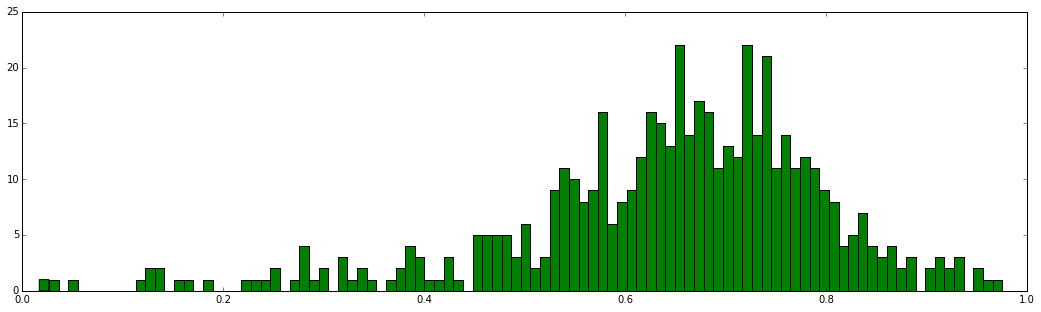


percentiles_on_sms_in_hourly /min percentile for each cell


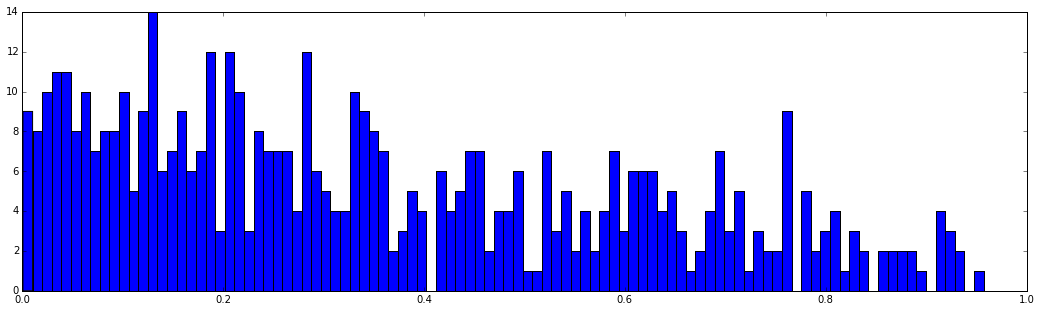


percentiles_on_sms_in_hourly /max percentile for each cell


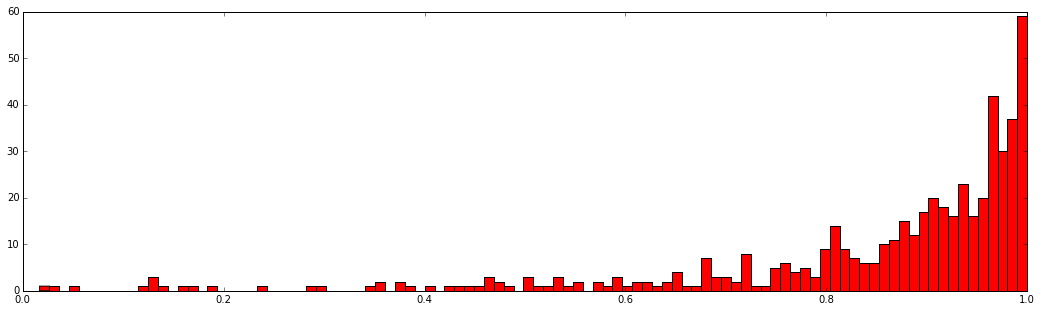


-----------------------------

percentiles_on_sms_out_hourly


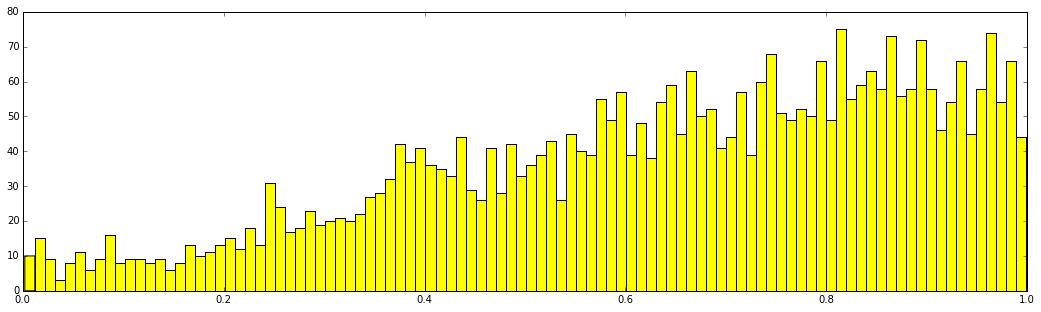

entropy:  4.44362313392 average:  0.643130946584

percentiles_on_sms_out_hourly /avg percentile for each cell


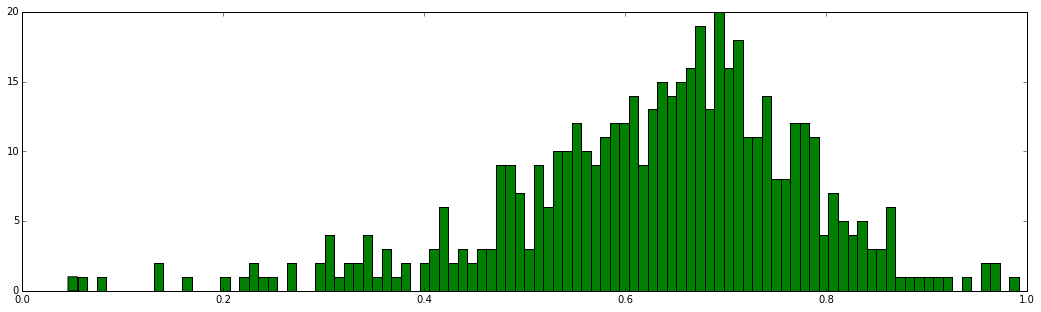


percentiles_on_sms_out_hourly /min percentile for each cell


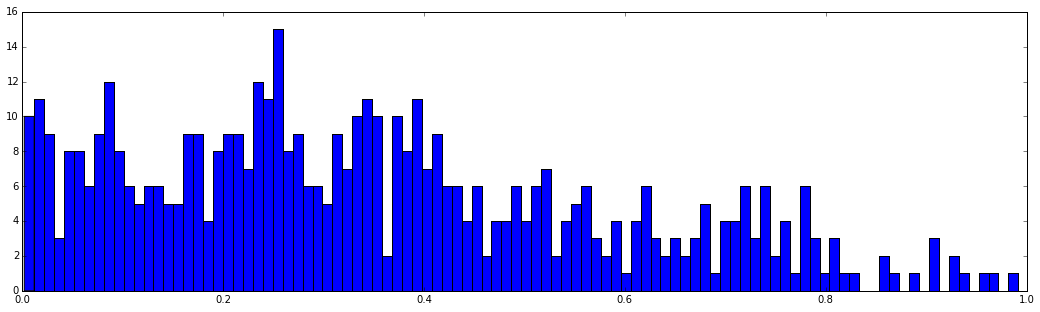


percentiles_on_sms_out_hourly /max percentile for each cell


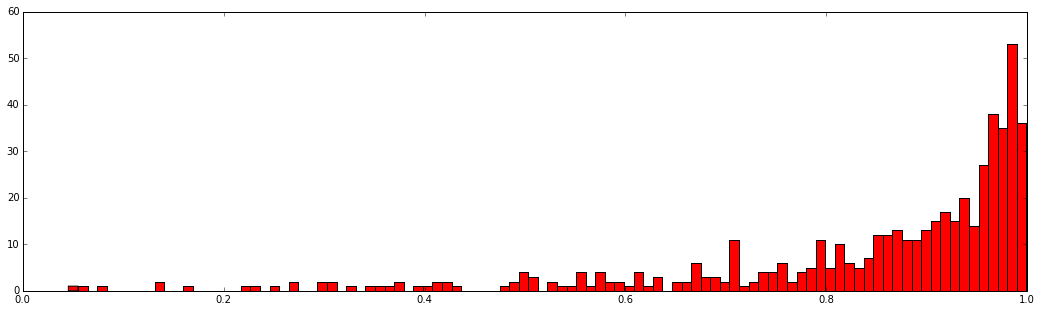

In [37]:
files=["percentiles_on_call_in","percentiles_on_call_out","percentiles_on_sms_in","percentiles_on_sms_out","percentiles_on_call_in_hourly","percentiles_on_call_out_hourly","percentiles_on_sms_in_hourly","percentiles_on_sms_out_hourly"]
for f in files:
    print '\n-----------------------------\n'
    print f
    filein=open(f,"r")
    p=[]
    p_avg=[]
    p_min=[]
    p_max=[]
    for line in filein:
        line=line.split(',')[1:-1]
        line=list(map(float,line))
        p+=line
        p_avg.append(np.average(line))
        p_min.append(np.min(line))
        p_max.append(np.max(line))
    plt.hist(p,100,color='yellow')
    plt.gcf().set_size_inches(18, 5)
    plt.show()
    H=np.histogram(p,100)
    print 'entropy: ', sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0]))]),'average: ', np.average(p)
    print '\n', f, '/avg percentile for each cell'
    plt.hist(p_avg,100, color='green')
    plt.gcf().set_size_inches(18, 5)
    plt.show()
    print '\n',f, '/min percentile for each cell'
    plt.hist(p_min,100)
    plt.gcf().set_size_inches(18, 5)
    plt.show()
    print '\n',f, '/max percentile for each cell'
    plt.hist(p_max,100,color='red')
    plt.gcf().set_size_inches(18, 5)
    plt.show()
    H=np.histogram(p,100)



In [72]:
files=["percentiles_on_call_in","percentiles_on_call_out","percentiles_on_sms_in","percentiles_on_sms_out","percentiles_on_call_in_hourly","percentiles_on_call_out_hourly","percentiles_on_sms_in_hourly","percentiles_on_sms_out_hourly"]
for f in files:
    print '\n-----------------------------\n'
    print f
    filein=open(f,"r")
    p=[]
    p_avg=[]
    p_min=[]
    p_max=[]
    c=0.
    k=0
    for line in filein:
        k+=1
        line=line.split(',')[1:-1]
        line=list(map(float,line))
        if np.std(line)<0.05 and len(line)>1:
            print np.average(line), len(line)
            
            c+=1
    print c/k
    


-----------------------------

percentiles_on_call_in
0.791366011446 2
0.170205237084 2
0.806052438128 2
0.072590738423 2
0.892898316809 2
0.66455078125 2
0.237138263666 2
0.488942639944 2
0.416666666666 2
0.73924553276 2
0.474829243613 2
0.817963643791 4
0.897258696153 2
0.79666809056 2
0.927069199457 2
0.858716475096 2
0.410225265018 2
0.569600499376 3
0.624222887405 2
0.73821930222 2
0.65981254782 2
0.542224880383 2
0.877633711508 2
0.305082897033 2
0.150579150579 3
0.879805661174 2
0.828752642706 2
0.380826781638 5
0.0552268244576

-----------------------------

percentiles_on_call_out
0.187332567929 3
0.829900332226 2
0.854331653468 2
0.554104867349 2
0.516255476136 2
0.406107784431 2
0.29028436019 6
0.393268579173 2
0.633271202237 2
0.84577828834 4
0.836971046771 2
0.86099433376 2
0.448827503974 2
0.704317386231 3
0.636818794531 2
0.680740573493 2
0.865541327125 2
0.7421875 2
0.717454095317 2
0.538368725868 2
0.269966015293 2
0.583952776563 2
0.541551331734 3
0.668958742632 2
0.